In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

In [2]:
data = pd.read_excel('/private/wuchenpeng/projects/high-molecular/Third/dup_log_StandardPCA.xlsx')

In [3]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,combined_feature,combined_feature1,combined_feature2,[n],转化率（%）
0,0.879620,0.823922,-0.699286,0.525044,-0.617757,-1.562491,-1.263118,-0.900084,-0.472893,-0.901174,-1.321379,-2.096500
1,0.114425,0.075557,-0.249200,-0.133108,0.131168,-1.562491,-1.263118,-0.967522,-0.190097,-0.983372,-0.002494,-0.111940
2,-0.677139,-0.698598,0.200886,-0.813942,0.880093,-1.562491,-1.263118,-1.035847,0.102445,-1.065569,0.309564,0.139623
3,-1.471483,-1.475471,0.650972,-1.497165,1.629018,-1.562491,-1.263118,-1.104265,0.396014,-1.147767,-1.038760,0.698654
4,1.707167,-0.698598,0.650972,0.525044,0.131168,-0.781246,-1.263118,-0.224848,0.027066,-0.424728,-0.229766,-0.097965
...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.114425,-0.389834,-0.249200,1.236826,-0.617757,0.000000,1.105855,1.282457,1.040563,0.813265,0.945808,0.609209
172,0.114425,-0.293015,-0.249200,1.236826,-0.617757,0.000000,1.105855,1.262473,0.986195,0.813265,0.918371,0.595234
173,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,2.586463,2.583433,1.040563,2.279097,0.686388,0.648342
174,0.114425,-0.389834,0.650972,1.236826,-0.617757,0.000000,4.067072,3.377463,1.040563,3.181000,0.310742,0.695859


0-1

In [4]:
data.columns

Index(['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', 'combined_feature',
       'combined_feature1', 'combined_feature2', '[n]', '转化率（%）'],
      dtype='object')

In [5]:
columns_to_normalize = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', 'combined_feature',
       'combined_feature1', 'combined_feature2', '[n]', '转化率（%）']
data_to_normalize = data[columns_to_normalize]

In [6]:
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(data_to_normalize)

In [7]:
data[columns_to_normalize] = pd.DataFrame(normalized_data, columns=columns_to_normalize)

In [8]:
data

,redox,azo,fe,ybc,温度,浓度,AMPS,combined_feature,combined_feature1,combined_feature2,[n],转化率（%）
0,0.739655,0.739655,0.083333,0.739655,0.25,0.00,0.000000,0.238976,0.411095,0.222010,0.000000,0.000
1,0.498925,0.498925,0.166667,0.498925,0.50,0.00,0.000000,0.228816,0.472758,0.208884,0.329025,0.710
2,0.249900,0.249900,0.250000,0.249900,0.75,0.00,0.000000,0.218523,0.536547,0.195759,0.406874,0.800
3,0.000000,0.000000,0.333333,0.000000,1.00,0.00,0.000000,0.208216,0.600559,0.182633,0.070505,1.000
4,1.000000,0.249900,0.333333,0.739655,0.50,0.25,0.000000,0.340699,0.520110,0.298091,0.272327,0.715
...,...,...,...,...,...,...,...,...,...,...,...,...
171,0.498925,0.349221,0.166667,1.000000,0.25,0.50,0.444444,0.567773,0.741102,0.495779,0.565599,0.968
172,0.498925,0.380365,0.166667,1.000000,0.25,0.50,0.444444,0.564763,0.729247,0.495779,0.558754,0.963
173,0.498925,0.349221,0.333333,1.000000,0.25,0.50,0.722222,0.763764,0.741102,0.729849,0.500881,0.982
174,0.498925,0.349221,0.333333,1.000000,0.25,0.50,1.000000,0.883384,0.741102,0.873868,0.407168,0.999


In [33]:
# data.to_excel('dup_log_StandardPCA_01norm.xlsx', index=False)

/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 27987 (\N{CJK UNIFIED IDEOGRAPH-6D53}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 36716 (\N{CJK UNIFIED IDEOGRAPH-8F6C}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/DL/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  fig.canvas.draw()
/private/wuchenpeng/anaconda3/envs/

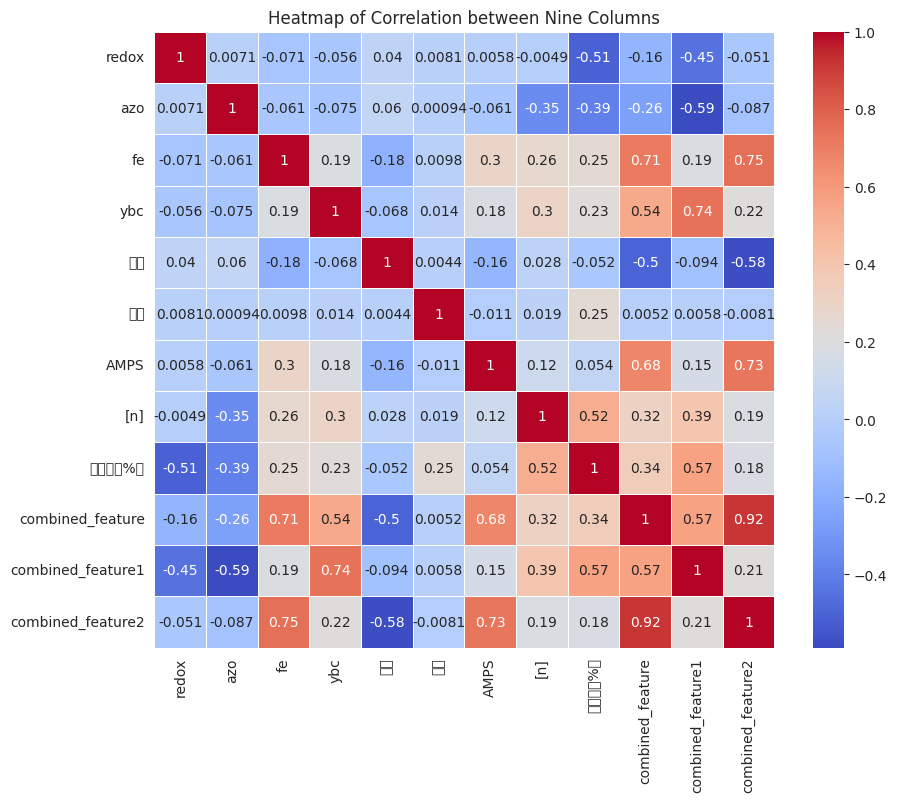

In [9]:
columns_to_print = ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', '[n]', '转化率（%）', 'combined_feature', 'combined_feature1', 'combined_feature2']
corr_matrix = data[columns_to_print].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap of Correlation between Nine Columns")
plt.show()

分割训练集和测试集

In [10]:
train_data, test_data = train_test_split(data, train_size=150, random_state=42)

In [11]:
train_data

,redox,azo,fe,ybc,温度,浓度,AMPS,combined_feature,combined_feature1,combined_feature2,[n],转化率（%）
117,0.249900,0.498925,0.000000,0.739655,1.00,0.75,0.444444,0.313946,0.648342,0.230431,0.470035,0.926
65,0.739655,1.000000,0.250000,0.000000,0.50,0.75,0.222222,0.213457,0.000000,0.366593,0.000000,0.000
90,0.739655,1.000000,0.250000,0.000000,0.50,0.75,0.333333,0.261305,0.000000,0.424201,0.000000,0.000
55,0.739655,0.000000,0.000000,0.498925,0.75,0.25,0.222222,0.237415,0.591096,0.175055,0.646005,0.980
29,1.000000,0.249900,0.333333,0.739655,0.50,0.25,0.111111,0.388547,0.520110,0.355699,0.951234,0.700
...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.498925,0.000000,0.250000,0.739655,0.00,1.00,0.222222,0.543908,0.764214,0.482051,0.706522,0.970
106,0.498925,1.000000,0.083333,0.249900,1.00,0.25,0.444444,0.201566,0.176985,0.277145,0.440658,0.525
14,1.000000,0.000000,0.166667,0.249900,0.25,0.75,0.000000,0.248238,0.408648,0.264503,0.336663,0.975
92,0.249900,0.498925,0.000000,0.739655,1.00,0.75,0.333333,0.266098,0.648342,0.172823,0.409224,0.930


In [12]:
# 特征和标签
X_train = train_data.iloc[:, :-2]
y_train = train_data.iloc[:, -2]
X_test = test_data.iloc[:, :-2]
y_test = test_data.iloc[:, -2]

In [13]:
X_train

,redox,azo,fe,ybc,温度,浓度,AMPS,combined_feature,combined_feature1,combined_feature2
117,0.249900,0.498925,0.000000,0.739655,1.00,0.75,0.444444,0.313946,0.648342,0.230431
65,0.739655,1.000000,0.250000,0.000000,0.50,0.75,0.222222,0.213457,0.000000,0.366593
90,0.739655,1.000000,0.250000,0.000000,0.50,0.75,0.333333,0.261305,0.000000,0.424201
55,0.739655,0.000000,0.000000,0.498925,0.75,0.25,0.222222,0.237415,0.591096,0.175055
29,1.000000,0.249900,0.333333,0.739655,0.50,0.25,0.111111,0.388547,0.520110,0.355699
...,...,...,...,...,...,...,...,...,...,...
71,0.498925,0.000000,0.250000,0.739655,0.00,1.00,0.222222,0.543908,0.764214,0.482051
106,0.498925,1.000000,0.083333,0.249900,1.00,0.25,0.444444,0.201566,0.176985,0.277145
14,1.000000,0.000000,0.166667,0.249900,0.25,0.75,0.000000,0.248238,0.408648,0.264503
92,0.249900,0.498925,0.000000,0.739655,1.00,0.75,0.333333,0.266098,0.648342,0.172823


In [14]:
y_train

117    0.470035
65     0.000000
90     0.000000
55     0.646005
29     0.951234
         ...   
71     0.706522
106    0.440658
14     0.336663
92     0.409224
102    0.235018
Name: [n], Length: 150, dtype: float64

In [15]:
# 特征缩放
scaler2 = StandardScaler()
X_train_scaled = scaler2.fit_transform(X_train)
X_test_scaled = scaler2.transform(X_test)

In [16]:
# 使用递归特征消除 (RFE) 进行特征选择
estimator = DecisionTreeRegressor(random_state=42)
selector = RFE(estimator, n_features_to_select=10, step=1)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

In [17]:
# 打印所选特征
selected_features = pd.Series(selector.support_, index=X_train.columns)
selected_feature_names = selected_features[selected_features].index.tolist()
print('Selected features:', selected_feature_names)

Selected features: ['redox', 'azo', 'fe', 'ybc', '温度', '浓度', 'AMPS', 'combined_feature', 'combined_feature1', 'combined_feature2']


In [18]:
# 使用随机森林回归器
rf_reg = RandomForestRegressor(n_estimators=90 , random_state=42)
rf_reg.fit(X_train_selected, y_train)
y_pred = rf_reg.predict(X_test_selected)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Model performance (MSE, R2):', mse, r2)

Model performance (MSE, R2): 0.025065448060469227 0.6235398442480857


In [19]:
# 不同算法对应的模型性能
models = {
    'Random Forest': RandomForestRegressor(n_estimators=50, random_state=42),
    'Linear Regression': LinearRegression(),
    'SVR': SVR(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'GBT': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'XGBR':XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    # 'MLP':MLPRegressor(hidden_layer_sizes=(100, 50),  # 设置隐藏层的节点数
    #                   activation='relu',             # 激活函数
    #                   solver='adam',                 # 优化算法
    #                   max_iter=1000,                 # 最大迭代次数
    #                   random_state=42)
}

In [45]:
# 测试不同模型
for name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} performance (MSE, R2):', mse, r2)

Random Forest performance (MSE, R2): 0.023676895527290926 0.644394636137261
Linear Regression performance (MSE, R2): 0.05088132407541938 0.23580894544210973
SVR performance (MSE, R2): 0.02538632939654767 0.6187204994086657
Decision Tree performance (MSE, R2): 0.03471213945544017 0.4786553428308217
GBT performance (MSE, R2): 0.025447547881337088 0.6178010536336243
XGBR performance (MSE, R2): 0.026960051625226657 0.5950846276744163
